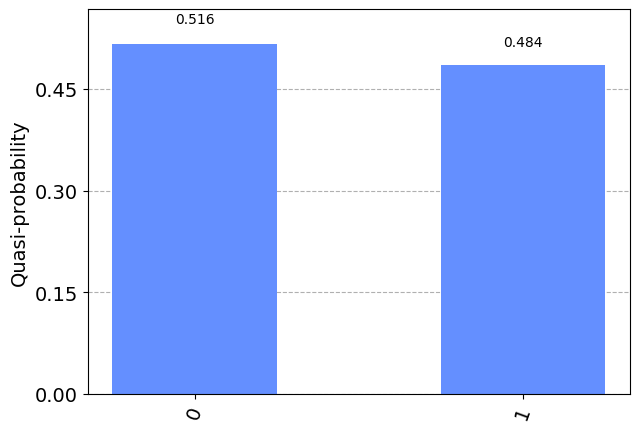

In [96]:
from math import ceil, log2
from qiskit import Aer, execute, QuantumCircuit

# Backend used to execute quantum circuits
QUANTUM_BACKEND = Aer.get_backend('qasm_simulator')

#! TODO: ERROR! For 8, will correctly use 3 qubits to generate numbers from 0 - 7. But, even for 7 (where we expect 0 - 6), it will still generate numbers from 0 - 7, possibly leading to index out of bounds error!
#! Too complex to fix (i.e. even my potential solution would be too complcated/ugly) so, for now, just hardcoding a random number generator that only generates 0 or 1
def random_list_index_generator(list_size, quantum_backend=QUANTUM_BACKEND):
    """For a list containing list_size items, randomly generate a list index (i.e. an integer from 0 to list_size-1)"""

    # Number of qubits needed to represent an integer from 0 to list_size-1 in binary
    # Eg. 7 (in decimal) = 111 (in binary)
    num_qubits = num_classical_bits = ceil(log2(list_size))
    random_num_circuit = QuantumCircuit(num_qubits, num_classical_bits)

    qubit_indices = range(num_qubits)
    classical_bit_indices = range(num_classical_bits)

    # Put all qubits into superposition
    for qubit_index in qubit_indices:
        random_num_circuit.h(qubit_index)
    
    # Measure all qubits
    random_num_circuit.measure(qubit_indices, classical_bit_indices)
    
    # return random_num_circuit

    # Execute circuit
    job = execute(random_num_circuit, backend=quantum_backend, shots=1)
    result = job.result()
    counts = result.get_counts()
    # Since we only ran one shot above, we already know that we only have one measured value
    # Eg. '111'
    measured_binary_value_string = list(counts.keys())[0]
    # Eg. 7
    measured_decimal_value = int(measured_binary_value_string, base=2)

    return measured_decimal_value

# random_num_circuit = random_list_index_generator(8)
# random_num_circuit.draw()

# random_list_index_generator(8)

# feedback_list = ['0', '1', '2', '3']

# # Unlike guesses, which are always displayed in order of entry, feedback for a superposition of guesses is intentionally displayed in a RANDOM order
# # Thus, for simplicity, create a separate list consisting of the same feedback strings as feedback_list, but in random order -- this list will be used only for DISPLAYING the feedback
# feedback_display_list = []
# feedback_list_copy = feedback_list.copy()

# print(f'{feedback_list=}')
# print(f'{feedback_list_copy=}')
# print(f'{feedback_display_list=}')

# print()

# # While feedback_list_copy is not empty, keep removing a randomly-selected feedback item from feedback_list_copy and adding it to feedback_display_list
# while feedback_list_copy:
#     print(f'{feedback_list_copy=}')
#     print(f'{len(feedback_list_copy)=}')
#     if len(feedback_list_copy) > 1:
#         random_feedback_list_copy_index = random_list_index_generator(len(feedback_list_copy))
#         print(f'{random_feedback_list_copy_index=}')
#         random_feedback = feedback_list_copy.pop(random_feedback_list_copy_index)
#         feedback_display_list.append(random_feedback)
#     else:
#         print('len(feedback_list_copy) = 1')
#         feedback_list_copy = []
#     print()

# print()

# print(f'{feedback_list=}')
# print(f'{feedback_list_copy=}')
# print(f'{feedback_display_list=}')

def random_0_1_generator(quantum_backend=QUANTUM_BACKEND):
    """Randomly generate either 0 or 1"""
    
    num_qubits = num_classical_bits = 1
    random_num_circuit = QuantumCircuit(num_qubits, num_classical_bits)

    qubit_index = classical_bit_index = 0
    # Put qubit into superposition of 0 and 1
    random_num_circuit.h(qubit_index)
    # Measure qubit
    random_num_circuit.measure(qubit_index, classical_bit_index)
    
    # Execute circuit
    job = execute(random_num_circuit, backend=quantum_backend, shots=1)
    result = job.result()
    counts = result.get_counts()
    # Since we only ran one shot above, we already know that we only have one measured value
    # Eg. '1'
    measured_binary_value_string = list(counts.keys())[0]
    # Eg. 1
    measured_decimal_value = int(measured_binary_value_string, base=2)

    return measured_decimal_value

random_0_1_generator()

In [11]:
from math import floor, log2
from qiskit import Aer, execute, QuantumCircuit
from qiskit.visualization import plot_distribution

QUANTUM_BACKEND = Aer.get_backend('qasm_simulator')

def random_number_generator(max, quantum_backend=QUANTUM_BACKEND):
    """Generates a random number from 0 to max (inclusive)"""

    # Number of bits (here, qubits) needed to represent a decimal number (here, max) in binary = floor(log_2(max)) + 1
    # Source: https://www.exploringbinary.com/number-of-bits-in-a-decimal-integer/
    # Note that this formula does NOT work if max = 0, since log_2(0) is not defined!
    #
    # Eg. Let max = 5
    #       5 (in decimal) = 101 (in binary) -> needs 3 bits to represent it
    #       log_2(5) = ~2.32
    #       floor(log_2(5)) = 2
    #       floor(log_2(5)) + 1 = 2 + 1 = 3
    #
    # Eg. Let max = 8
    #       8 (in decimal) = 1000 (in binary) -> needs 4 bits to represent it
    #       log_2(8) = 3
    #       floor(log_2(8)) = 3
    #       floor(log_2(8)) + 1 = 3 + 1 = 4
    if max == 0:
        num_qubits = num_classical_bits = 1
    else:
        num_qubits = num_classical_bits = floor(log2(max)) + 1
    
    random_num_circuit = QuantumCircuit(num_qubits, num_classical_bits)

    qubit_indices = range(num_qubits)
    classical_bit_indices = range(num_classical_bits)

    # Put all qubits into superposition
    for qubit_index in qubit_indices:
        random_num_circuit.h(qubit_index)

    # Measure all qubits
    random_num_circuit.measure(qubit_indices, classical_bit_indices)

    # NOTE: The above circuit will NOT necessarily respect max!
    # Eg. If max = 4, it needs 3 qubits to be represented. However, a 3-qubit circuit with all qubits in superposition can produce ANY number from 0 to ((2^3) - 1) = from 0 to 7!
    # Thus, even though max is 4, our circuit may generate a number greater than 4!
    # Thus, need to check if that has happened and, if so, keep re-running the circuit until we get a number <= max
    
    random_decimal_num = max + 1
    while random_decimal_num > max:
        # Execute circuit
        job = execute(random_num_circuit, backend=quantum_backend, shots=1)
        result = job.result()
        counts = result.get_counts()
        # Since we only ran one shot above, we already know that we only have one measured value
        # Eg. '101'
        random_binary_num_string = list(counts.keys())[0]
        # Eg. 5
        random_decimal_num = int(random_binary_num_string, base=2)
    
    return random_decimal_num

decimal_counts = []
for _ in range(100):
    decimal_counts.append(random_number_generator(4))

print(decimal_counts)

[3, 1, 1, 0, 4, 1, 0, 4, 3, 0, 4, 1, 0, 3, 3, 2, 0, 1, 0, 2, 2, 0, 2, 1, 1, 3, 1, 2, 1, 3, 3, 2, 2, 0, 3, 2, 3, 4, 4, 4, 1, 2, 4, 3, 3, 0, 1, 4, 4, 3, 4, 2, 3, 2, 1, 1, 1, 3, 2, 0, 0, 3, 2, 3, 4, 1, 2, 4, 4, 0, 4, 4, 0, 3, 0, 4, 1, 0, 2, 1, 1, 3, 2, 3, 4, 2, 4, 1, 3, 2, 0, 1, 1, 3, 4, 0, 0, 4, 2, 1]
